In [41]:
import pandas as pd
from joblib import dump, load
from sympy import centroid
import numpy as np

In [2]:
user = pd.read_parquet("user.parquet")
friend = pd.read_parquet("friend.parquet")
photo = pd.read_parquet("photo.parquet")
biography = pd.read_parquet("biography.parquet")
post = pd.read_parquet("post.parquet")
group = pd.read_parquet("group_table.parquet")

In [3]:
user

,id,vk_id,first_name,last_name,birth_date,age
0,1,304375450,Алексей,Купцов,1.1.2007,17.0
1,2,664945617,นางฟ้า,ธิดาซาตาน,1.1.2007,17.0
2,3,381637103,Виктория,Рознина,1.1.2007,17.0
3,4,260892289,Вероника,Малышева,1.1.2007,17.0
4,5,129110414,Ольга,Никитина,1.1.2007,17.0
...,...,...,...,...,...,...
27235,99767,448095161,Андрей,Миренков,29.1.2005,19.0
27236,99768,462272170,Artem,Volkov,29.1.2005,19.0
27237,99769,441298535,Иван,Боднарюк,29.1.2005,19.0
27238,99770,277412011,Александр,Галай,29.1.2005,19.0


In [4]:
newd = pd.DataFrame(columns=['user_id', 'anon_pab'])
group2 = group
# Группировка по user_id
for user_id, gr in group2.groupby('user_id'):  # Исправленный цикл
    gr['name'].fillna('', inplace=True)
    counter = gr[gr['name'].str.lower().str.contains('аноним')].shape[0]
    counter += gr[gr['name'].str.lower().str.contains('знакомств')].shape[0]
    new_row = pd.DataFrame({'user_id': [user_id], 'anon_pab': [counter]})
    newd = pd.concat([newd, new_row])
anon_group = newd
anon_group

C:\Users\hedge\AppData\Local\Temp\ipykernel_3080\3957621221.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gr['name'].fillna('', inplace=True)


,user_id,anon_pab
0,2,0
0,3,0
0,4,3
0,5,0
0,6,0
...,...,...
0,99767,4
0,99768,0
0,99769,0
0,99770,3


In [5]:
biography2 = biography.drop(columns=["id", "user_id"]).applymap(lambda x: 0 if (x is None) else 1)
biography2["user_id"] = biography["user_id"]
biography2

C:\Users\hedge\AppData\Local\Temp\ipykernel_3080\1319405078.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  biography2 = biography.drop(columns=["id", "user_id"]).applymap(lambda x: 0 if (x is None) else 1)


,activity,interests,music,films,tv,books,games,quotes,about,user_id
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
27234,0,0,0,0,0,0,0,0,0,99767
27235,0,0,0,0,0,0,0,0,0,99768
27236,0,0,0,0,0,0,0,0,0,99769
27237,0,0,0,0,0,0,0,0,0,99770


In [6]:
friend["city"] = friend["city"].apply(lambda x: None if (x is None or x == "") else x)
friend = friend[friend["city"].notna()]
friend

,id,user_id,first_name,last_name,city,education,work
1,2,2,Андрей,Таллерман,Санкт-Петербург,None,None
2,3,2,Memo,Tamer,Luxor,None,None
4,5,2,Mark,James,Dublin,None,None
6,7,2,Andr,Yahu,Tokyo,None,None
7,8,2,Hulagu,Tashkurgan,İstanbul,None,None
...,...,...,...,...,...,...,...
4573675,5636248,99771,Молли,Афанасьева,Кобрин,None,None
4573679,5636252,99771,Дмитрий,Кобринский,Кобрин,None,None
4573682,5636255,99771,Юра,Поддубный,Кобрин,None,None
4573684,5636257,99771,Арсений,Иванюк,Кобрин,None,None


In [7]:
diff_city_count = friend.groupby('user_id').agg(diff_city_count=("city", "nunique"))
diff_city_count

,diff_city_count
user_id,
2,83
3,6
4,28
5,10
6,63
...,...
99767,12
99768,10
99769,9


In [8]:
friends_count = friend.groupby('user_id').agg(friend_count=("id", "count"))
friends_count

,friend_count
user_id,
2,373
3,24
4,105
5,89
6,473
...,...
99767,44
99768,53
99769,48


In [9]:
avg_photo_likes = photo.groupby('user_id').agg(avg_photo_likes=("like_count", "mean"))
avg_photo_likes

,avg_photo_likes
user_id,
2,35.714286
3,46.000000
4,77.571429
5,25.777778
6,182.888889
...,...
99762,3.548387
99763,0.714286
99764,6.083333


In [10]:
photo_count = photo.groupby('user_id').agg(photo_count=("id", "count"))
photo_count

,photo_count
user_id,
2,7
3,2
4,7
5,18
6,45
...,...
99762,31
99763,7
99764,12


In [11]:
post_count_owner = post[post["isowner"] == 1].groupby('user_id').agg(post_count_owner=("id", "count"))
post_count_owner

,post_count_owner
user_id,
2,5
3,7
4,17
5,3
6,6
...,...
99763,13
99764,20
99765,1


In [12]:
post_count_friend = post[post["isowner"] == 0].groupby('user_id').agg(post_count_friend=("id", "count"))
post_count_friend

,post_count_friend
user_id,
2,15
5,17
6,14
7,13
8,20
...,...
99755,7
99757,2
99761,4


In [13]:
post_count_delete = post[post["text"] == "Запись удалена"].groupby('user_id').agg(post_count_delete=("id", "count"))
post_count_delete

,post_count_delete
user_id,
2,14
6,2
10,4
16,2
45,1
...,...
99740,2
99742,1
99749,9


In [14]:
group_count = group.groupby('user_id').agg(group_count=("id", "count"))
group_count

,group_count
user_id,
2,15
3,21
4,84
5,56
6,102
...,...
99767,67
99768,50
99769,173


In [15]:
user.head()

,id,vk_id,first_name,last_name,birth_date,age
0,1,304375450,Алексей,Купцов,1.1.2007,17.0
1,2,664945617,นางฟ้า,ธิดาซาตาน,1.1.2007,17.0
2,3,381637103,Виктория,Рознина,1.1.2007,17.0
3,4,260892289,Вероника,Малышева,1.1.2007,17.0
4,5,129110414,Ольга,Никитина,1.1.2007,17.0


In [82]:
user_new = user
user_new["user_id"] = user["id"]
user_new = user_new.drop("id", axis=1)
user_new = user_new.merge(avg_photo_likes, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(photo_count, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(post_count_owner, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(post_count_friend, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(post_count_delete, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(group_count, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(anon_group, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(diff_city_count, left_on="user_id", right_on="user_id", how="left")
user_new = user_new.merge(friends_count, left_on="user_id", right_on="user_id", how="left")

In [83]:
user_new["like_friend_ratio"] = (user_new["friend_count"]) / (user_new["avg_photo_likes"] + 1)
user_new

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,304375450,Алексей,Купцов,1.1.2007,17.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,664945617,นางฟ้า,ธิดาซาตาน,1.1.2007,17.0,2,35.714286,7.0,5.0,15.0,14.0,15.0,0,83.0,373.0,10.159533
2,381637103,Виктория,Рознина,1.1.2007,17.0,3,46.000000,2.0,7.0,NaN,NaN,21.0,0,6.0,24.0,0.510638
3,260892289,Вероника,Малышева,1.1.2007,17.0,4,77.571429,7.0,17.0,NaN,NaN,84.0,3,28.0,105.0,1.336364
4,129110414,Ольга,Никитина,1.1.2007,17.0,5,25.777778,18.0,3.0,17.0,NaN,56.0,0,10.0,89.0,3.323651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,448095161,Андрей,Миренков,29.1.2005,19.0,99767,NaN,NaN,NaN,NaN,NaN,67.0,4,12.0,44.0,NaN
27236,462272170,Artem,Volkov,29.1.2005,19.0,99768,NaN,NaN,NaN,NaN,NaN,50.0,0,10.0,53.0,NaN
27237,441298535,Иван,Боднарюк,29.1.2005,19.0,99769,24.000000,1.0,NaN,NaN,NaN,173.0,0,9.0,48.0,1.920000
27238,277412011,Александр,Галай,29.1.2005,19.0,99770,NaN,NaN,2.0,NaN,NaN,200.0,3,44.0,146.0,NaN


In [84]:
user_new["friend_count"] = user_new["friend_count"].fillna(-1)
user_new

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,304375450,Алексей,Купцов,1.1.2007,17.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
1,664945617,นางฟ้า,ธิดาซาตาน,1.1.2007,17.0,2,35.714286,7.0,5.0,15.0,14.0,15.0,0,83.0,373.0,10.159533
2,381637103,Виктория,Рознина,1.1.2007,17.0,3,46.000000,2.0,7.0,NaN,NaN,21.0,0,6.0,24.0,0.510638
3,260892289,Вероника,Малышева,1.1.2007,17.0,4,77.571429,7.0,17.0,NaN,NaN,84.0,3,28.0,105.0,1.336364
4,129110414,Ольга,Никитина,1.1.2007,17.0,5,25.777778,18.0,3.0,17.0,NaN,56.0,0,10.0,89.0,3.323651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,448095161,Андрей,Миренков,29.1.2005,19.0,99767,NaN,NaN,NaN,NaN,NaN,67.0,4,12.0,44.0,NaN
27236,462272170,Artem,Volkov,29.1.2005,19.0,99768,NaN,NaN,NaN,NaN,NaN,50.0,0,10.0,53.0,NaN
27237,441298535,Иван,Боднарюк,29.1.2005,19.0,99769,24.000000,1.0,NaN,NaN,NaN,173.0,0,9.0,48.0,1.920000
27238,277412011,Александр,Галай,29.1.2005,19.0,99770,NaN,NaN,2.0,NaN,NaN,200.0,3,44.0,146.0,NaN


In [85]:
user_new.to_parquet("base_test.parquet", index=False)

In [86]:
# Определение IQR
Q1 = user_new['friend_count'].quantile(0.25)
Q3 = user_new['friend_count'].quantile(0.85)
IQR = Q3 - Q1

# Верхняя граница по IQR
upper_bound_IQR = Q3 + 1.5 * IQR

print(f"Upper bound by IQR: {upper_bound_IQR}")

# Фильтрация данных
filtered_IQR = user_new[user_new['friend_count'] <= upper_bound_IQR]

print(f"Number of rows after IQR filtering: {len(filtered_IQR)}")
filtered_IQR

Upper bound by IQR: 312.0
Number of rows after IQR filtering: 26148


,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,304375450,Алексей,Купцов,1.1.2007,17.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
2,381637103,Виктория,Рознина,1.1.2007,17.0,3,46.000000,2.0,7.0,NaN,NaN,21.0,0,6.0,24.0,0.510638
3,260892289,Вероника,Малышева,1.1.2007,17.0,4,77.571429,7.0,17.0,NaN,NaN,84.0,3,28.0,105.0,1.336364
4,129110414,Ольга,Никитина,1.1.2007,17.0,5,25.777778,18.0,3.0,17.0,NaN,56.0,0,10.0,89.0,3.323651
6,460983785,Диана,Антоненко,1.1.2007,17.0,7,32.000000,1.0,7.0,13.0,NaN,200.0,4,25.0,133.0,4.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,448095161,Андрей,Миренков,29.1.2005,19.0,99767,NaN,NaN,NaN,NaN,NaN,67.0,4,12.0,44.0,NaN
27236,462272170,Artem,Volkov,29.1.2005,19.0,99768,NaN,NaN,NaN,NaN,NaN,50.0,0,10.0,53.0,NaN
27237,441298535,Иван,Боднарюк,29.1.2005,19.0,99769,24.000000,1.0,NaN,NaN,NaN,173.0,0,9.0,48.0,1.920000
27238,277412011,Александр,Галай,29.1.2005,19.0,99770,NaN,NaN,2.0,NaN,NaN,200.0,3,44.0,146.0,NaN


In [87]:
filtered_IQR["friend_count"] = filtered_IQR["friend_count"].apply(lambda x: None if x == -1 else x)
filtered_IQR
# user_new["friend_count"] = user_new["friend_count"].apply(lambda x: None if x==-1 else x)

C:\Users\hedge\AppData\Local\Temp\ipykernel_3080\4210858399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_IQR["friend_count"] = filtered_IQR["friend_count"].apply(lambda x: None if x == -1 else x)


,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,304375450,Алексей,Купцов,1.1.2007,17.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,381637103,Виктория,Рознина,1.1.2007,17.0,3,46.000000,2.0,7.0,NaN,NaN,21.0,0,6.0,24.0,0.510638
3,260892289,Вероника,Малышева,1.1.2007,17.0,4,77.571429,7.0,17.0,NaN,NaN,84.0,3,28.0,105.0,1.336364
4,129110414,Ольга,Никитина,1.1.2007,17.0,5,25.777778,18.0,3.0,17.0,NaN,56.0,0,10.0,89.0,3.323651
6,460983785,Диана,Антоненко,1.1.2007,17.0,7,32.000000,1.0,7.0,13.0,NaN,200.0,4,25.0,133.0,4.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,448095161,Андрей,Миренков,29.1.2005,19.0,99767,NaN,NaN,NaN,NaN,NaN,67.0,4,12.0,44.0,NaN
27236,462272170,Artem,Volkov,29.1.2005,19.0,99768,NaN,NaN,NaN,NaN,NaN,50.0,0,10.0,53.0,NaN
27237,441298535,Иван,Боднарюк,29.1.2005,19.0,99769,24.000000,1.0,NaN,NaN,NaN,173.0,0,9.0,48.0,1.920000
27238,277412011,Александр,Галай,29.1.2005,19.0,99770,NaN,NaN,2.0,NaN,NaN,200.0,3,44.0,146.0,NaN


In [88]:
user_new = filtered_IQR
user_new

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,304375450,Алексей,Купцов,1.1.2007,17.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,381637103,Виктория,Рознина,1.1.2007,17.0,3,46.000000,2.0,7.0,NaN,NaN,21.0,0,6.0,24.0,0.510638
3,260892289,Вероника,Малышева,1.1.2007,17.0,4,77.571429,7.0,17.0,NaN,NaN,84.0,3,28.0,105.0,1.336364
4,129110414,Ольга,Никитина,1.1.2007,17.0,5,25.777778,18.0,3.0,17.0,NaN,56.0,0,10.0,89.0,3.323651
6,460983785,Диана,Антоненко,1.1.2007,17.0,7,32.000000,1.0,7.0,13.0,NaN,200.0,4,25.0,133.0,4.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27235,448095161,Андрей,Миренков,29.1.2005,19.0,99767,NaN,NaN,NaN,NaN,NaN,67.0,4,12.0,44.0,NaN
27236,462272170,Artem,Volkov,29.1.2005,19.0,99768,NaN,NaN,NaN,NaN,NaN,50.0,0,10.0,53.0,NaN
27237,441298535,Иван,Боднарюк,29.1.2005,19.0,99769,24.000000,1.0,NaN,NaN,NaN,173.0,0,9.0,48.0,1.920000
27238,277412011,Александр,Галай,29.1.2005,19.0,99770,NaN,NaN,2.0,NaN,NaN,200.0,3,44.0,146.0,NaN


In [89]:
import numpy as np

# Среднее и стандартное отклонение для правила 3-х сигм
mean_friend_count = user_new[user_new["friend_count"].isna()]['avg_photo_likes'].mean()
std_friend_count = user_new[user_new["friend_count"].isna()]['avg_photo_likes'].std()

# Среднее и стандартное отклонение для правила 3-х сигм 2
mean_friend_count2 = user_new[~user_new["friend_count"].isna()]['like_friend_ratio'].mean()
std_friend_count2 = user_new[~user_new["friend_count"].isna()]['like_friend_ratio'].std()

# Верхняя граница по правилу 3-х сигм
upper_bound_3sigma = mean_friend_count + 3 * std_friend_count

# Верхняя граница по правилу 3-х сигм 2
upper_bound_3sigma2 = mean_friend_count2 + 3 * std_friend_count2

print(f"Upper bound by 3-sigma rule: {upper_bound_3sigma}")
print(f"Upper bound by 3-sigma rule2: {upper_bound_3sigma2}")

# Фильтрация данных
filtered_3sigma_with_nan = user_new[user_new["friend_count"].isna()].reset_index()
filtered_3sigma_without_nan = user_new[~user_new["friend_count"].isna()].reset_index()

filtered_3sigma_with_nan = filtered_3sigma_with_nan[
    filtered_3sigma_with_nan['avg_photo_likes'] <= upper_bound_3sigma].reset_index()
filtered_3sigma_without_nan = filtered_3sigma_without_nan[
    filtered_3sigma_without_nan['like_friend_ratio'] <= upper_bound_3sigma2].reset_index()

# Объединение результатов
all_filtered_3sigma = pd.concat([filtered_3sigma_with_nan, filtered_3sigma_without_nan])

print(f"Number of rows after 3-sigma filtering: {len(all_filtered_3sigma)}")

Upper bound by 3-sigma rule: 5439.977029293548
Upper bound by 3-sigma rule2: 37.78247336126409
Number of rows after 3-sigma filtering: 20866


In [90]:
user_new = all_filtered_3sigma
user_new.drop(columns=["level_0", "index"], inplace=True)
user_new.head(1)

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,379798774,Елена,Кумшацкая,1.1.2007,17.0,10,2.666667,3.0,1.0,19.0,4.0,NaN,NaN,NaN,NaN,NaN


In [91]:
user_new

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,like_friend_ratio
0,379798774,Елена,Кумшацкая,1.1.2007,17.0,10,2.666667,3.0,1.0,19.0,4.0,NaN,NaN,NaN,NaN,NaN
1,133343174,Анатолий,Голубец,1.1.2007,17.0,29,25.000000,4.0,NaN,1.0,NaN,36.0,0,NaN,NaN,NaN
2,164421917,Маша,Заверуха,1.1.2007,17.0,101,10.000000,5.0,2.0,NaN,NaN,1.0,0,NaN,NaN,NaN
3,476302530,Дина,Аверина,1.1.2007,17.0,154,3.500000,2.0,1.0,NaN,NaN,13.0,0,NaN,NaN,NaN
4,311097298,Саня,Фёдоров,1.1.2007,17.0,326,0.000000,1.0,1.0,10.0,NaN,23.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19912,505137620,Вера,Донских,29.1.2005,19.0,99761,1.000000,1.0,16.0,4.0,1.0,1.0,0,5.0,8.0,4.000000
19913,495644176,Захар,Сильченко,29.1.2005,19.0,99762,3.548387,31.0,19.0,1.0,NaN,37.0,2,6.0,23.0,5.056738
19914,256485116,Vika,Coroleva,29.1.2005,19.0,99763,0.714286,7.0,13.0,NaN,NaN,2.0,0,1.0,3.0,1.750000
19915,390326578,Михаил,Овчинников,29.1.2005,19.0,99764,6.083333,12.0,20.0,NaN,NaN,28.0,0,4.0,10.0,1.411765


In [92]:
user_new["avg_photo_likes"] = user_new["avg_photo_likes"].fillna(0)
user_new["photo_count"] = user_new["photo_count"].fillna(0)
user_new["post_count_owner"] = user_new["post_count_owner"].fillna(0)
user_new["post_count_friend"] = user_new["post_count_friend"].fillna(0)
user_new["post_count_delete"] = user_new["post_count_delete"].fillna(0)

user_new.fillna(-3, inplace=True)
user_new.drop("like_friend_ratio", axis=1, inplace=True)
user_new

C:\Users\hedge\AppData\Local\Temp\ipykernel_3080\2831818196.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_new.fillna(-3, inplace=True)


,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count
0,379798774,Елена,Кумшацкая,1.1.2007,17.0,10,2.666667,3.0,1.0,19.0,4.0,-3.0,-3,-3.0,-3.0
1,133343174,Анатолий,Голубец,1.1.2007,17.0,29,25.000000,4.0,0.0,1.0,0.0,36.0,0,-3.0,-3.0
2,164421917,Маша,Заверуха,1.1.2007,17.0,101,10.000000,5.0,2.0,0.0,0.0,1.0,0,-3.0,-3.0
3,476302530,Дина,Аверина,1.1.2007,17.0,154,3.500000,2.0,1.0,0.0,0.0,13.0,0,-3.0,-3.0
4,311097298,Саня,Фёдоров,1.1.2007,17.0,326,0.000000,1.0,1.0,10.0,0.0,23.0,0,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19912,505137620,Вера,Донских,29.1.2005,19.0,99761,1.000000,1.0,16.0,4.0,1.0,1.0,0,5.0,8.0
19913,495644176,Захар,Сильченко,29.1.2005,19.0,99762,3.548387,31.0,19.0,1.0,0.0,37.0,2,6.0,23.0
19914,256485116,Vika,Coroleva,29.1.2005,19.0,99763,0.714286,7.0,13.0,0.0,0.0,2.0,0,1.0,3.0
19915,390326578,Михаил,Овчинников,29.1.2005,19.0,99764,6.083333,12.0,20.0,0.0,0.0,28.0,0,4.0,10.0


## КЛАСТЕРИЗАЦИЯ

In [93]:
features = user_new.drop(columns=["vk_id", "age", "user_id", "first_name", "last_name", "birth_date"])
features_old = features.copy()
features

,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count
0,2.666667,3.0,1.0,19.0,4.0,-3.0,-3,-3.0,-3.0
1,25.000000,4.0,0.0,1.0,0.0,36.0,0,-3.0,-3.0
2,10.000000,5.0,2.0,0.0,0.0,1.0,0,-3.0,-3.0
3,3.500000,2.0,1.0,0.0,0.0,13.0,0,-3.0,-3.0
4,0.000000,1.0,1.0,10.0,0.0,23.0,0,-3.0,-3.0
...,...,...,...,...,...,...,...,...,...
19912,1.000000,1.0,16.0,4.0,1.0,1.0,0,5.0,8.0
19913,3.548387,31.0,19.0,1.0,0.0,37.0,2,6.0,23.0
19914,0.714286,7.0,13.0,0.0,0.0,2.0,0,1.0,3.0
19915,6.083333,12.0,20.0,0.0,0.0,28.0,0,4.0,10.0


In [94]:
# features.to_parquet("features_test.parquet", index = False)

In [95]:
features_columns = features.columns

In [96]:
# Стандартизация только видимых друзей
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

features["friend_count"] = features["friend_count"].replace(0, np.nan).apply(lambda x: np.log1p(x) if x != -3 else x)
features["friend_count"] = features["friend_count"].replace(np.nan, 0)
features["friend_count"] = features["friend_count"].replace(-3, np.nan)
f_sc = StandardScaler()
dump(f_sc, 'f_sc.joblib')
features['friend_count'] = f_sc.fit_transform(features['friend_count'].values.reshape(-1, 1))

features["diff_city_count"] = features["diff_city_count"].replace(0, np.nan).apply(
    lambda x: np.log1p(x) if x != -3 else x)
features["diff_city_count"] = features["diff_city_count"].replace(np.nan, 0)
features["diff_city_count"] = features["diff_city_count"].replace(-3, np.nan)
diff_sc = StandardScaler()
dump(diff_sc, 'diff_sc.joblib')
features['diff_city_count'] = diff_sc.fit_transform(features['diff_city_count'].values.reshape(-1, 1))

features["group_count"] = features["group_count"].replace(0, np.nan).apply(lambda x: np.log1p(x) if x != -3 else x)
features["group_count"] = features["group_count"].replace(np.nan, 0)
features["group_count"] = features["group_count"].replace(-3, np.nan)
gr_sc = StandardScaler()
dump(gr_sc, 'gr_sc.joblib')

features['group_count'] = gr_sc.fit_transform(features['group_count'].values.reshape(-1, 1))

features["anon_pab"] = features["anon_pab"].replace(0, np.nan).apply(lambda x: np.log1p(x) if x != -3 else x)
features["anon_pab"] = features["anon_pab"].replace(np.nan, 0)
features["anon_pab"] = features["anon_pab"].replace(-3, np.nan)
anon_sc = RobustScaler()
dump(anon_sc, 'anon_sc.joblib')
features['anon_pab'] = anon_sc.fit_transform(features['anon_pab'].values.reshape(-1, 1))

features.fillna(-2, inplace=True)
features

,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count
0,2.666667,3.0,1.0,19.0,4.0,-2.000000,-2.000000,-2.000000,-2.000000
1,25.000000,4.0,0.0,1.0,0.0,-0.046676,0.000000,-2.000000,-2.000000
2,10.000000,5.0,2.0,0.0,0.0,-2.246151,0.000000,-2.000000,-2.000000
3,3.500000,2.0,1.0,0.0,0.0,-0.779284,0.000000,-2.000000,-2.000000
4,0.000000,1.0,1.0,10.0,0.0,-0.372978,0.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...
19912,1.000000,1.0,16.0,4.0,1.0,-2.246151,0.000000,-0.780104,-1.297100
19913,3.548387,31.0,19.0,1.0,0.0,-0.026573,1.584963,-0.591393,-0.439875
19914,0.714286,7.0,13.0,0.0,0.0,-1.940503,0.000000,-2.125022,-2.005836
19915,6.083333,12.0,20.0,0.0,0.0,-0.230324,0.000000,-1.003301,-1.121718


In [97]:
from sklearn.preprocessing import MinMaxScaler

features["avg_photo_likes"] = features["avg_photo_likes"].replace(0, np.nan).apply(lambda x: np.log1p(x))
features["photo_count"] = features["photo_count"].replace(0, np.nan).apply(lambda x: np.log1p(x))

postO_sc = MinMaxScaler()
dump(postO_sc, 'postO_sc.joblib')
features['post_count_owner'] = postO_sc.fit_transform(features['post_count_owner'].values.reshape(-1, 1))

postF_sc = MinMaxScaler()
dump(postF_sc, 'postF_sc.joblib')
features['post_count_friend'] = postF_sc.fit_transform(features['post_count_friend'].values.reshape(-1, 1))

postD_sc = MinMaxScaler()
dump(postD_sc, 'postD_sc.joblib')
features['post_count_delete'] = postD_sc.fit_transform(features['post_count_delete'].values.reshape(-1, 1))

like_sc = StandardScaler()
dump(like_sc, 'like_sc.joblib')
features['avg_photo_likes'] = like_sc.fit_transform(features['avg_photo_likes'].values.reshape(-1, 1))

photoC_sc = RobustScaler()
dump(photoC_sc, 'photoC_sc.joblib')
features['photo_count'] = photoC_sc.fit_transform(features['photo_count'].values.reshape(-1, 1))

features.fillna(0, inplace=True)
features

,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count
0,-1.265568,0.000000,0.05,0.95,0.20,-2.000000,-2.000000,-2.000000,-2.000000
1,0.422199,0.138647,0.00,0.05,0.00,-0.046676,0.000000,-2.000000,-2.000000
2,-0.318974,0.251930,0.10,0.00,0.00,-2.246151,0.000000,-2.000000,-2.000000
3,-1.089112,-0.178747,0.05,0.00,0.00,-0.779284,0.000000,-2.000000,-2.000000
4,0.000000,-0.430677,0.05,0.50,0.00,-0.372978,0.000000,-2.000000,-2.000000
...,...,...,...,...,...,...,...,...,...
19912,-1.787831,-0.430677,0.80,0.20,0.05,-2.246151,0.000000,-0.780104,-1.297100
19913,-1.079896,1.292030,0.95,0.05,0.00,-0.026573,1.584963,-0.591393,-0.439875
19914,-1.920652,0.430677,0.65,0.00,0.00,-1.940503,0.000000,-2.125022,-2.005836
19915,-0.698220,0.732340,1.00,0.00,0.00,-0.230324,0.000000,-1.003301,-1.121718


KMEANS

In [98]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применение KMeans для кластеризации на 2 кластера
kmeans = KMeans(n_clusters=2, random_state=42)
features['cluster'] = kmeans.fit_predict(features)
dump(kmeans, 'kmeans1.joblib')

# Добавление целевой переменной на основе кластера (0 - экстраверт, 1 - интроверт)
train = user_new
train['target'] = features['cluster']
train

,vk_id,first_name,last_name,birth_date,age,user_id,avg_photo_likes,photo_count,post_count_owner,post_count_friend,post_count_delete,group_count,anon_pab,diff_city_count,friend_count,target
0,379798774,Елена,Кумшацкая,1.1.2007,17.0,10,2.666667,3.0,1.0,19.0,4.0,-3.0,-3,-3.0,-3.0,0
1,133343174,Анатолий,Голубец,1.1.2007,17.0,29,25.000000,4.0,0.0,1.0,0.0,36.0,0,-3.0,-3.0,0
2,164421917,Маша,Заверуха,1.1.2007,17.0,101,10.000000,5.0,2.0,0.0,0.0,1.0,0,-3.0,-3.0,0
3,476302530,Дина,Аверина,1.1.2007,17.0,154,3.500000,2.0,1.0,0.0,0.0,13.0,0,-3.0,-3.0,0
4,311097298,Саня,Фёдоров,1.1.2007,17.0,326,0.000000,1.0,1.0,10.0,0.0,23.0,0,-3.0,-3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19912,505137620,Вера,Донских,29.1.2005,19.0,99761,1.000000,1.0,16.0,4.0,1.0,1.0,0,5.0,8.0,0
19913,495644176,Захар,Сильченко,29.1.2005,19.0,99762,3.548387,31.0,19.0,1.0,0.0,37.0,2,6.0,23.0,1
19914,256485116,Vika,Coroleva,29.1.2005,19.0,99763,0.714286,7.0,13.0,0.0,0.0,2.0,0,1.0,3.0,0
19915,390326578,Михаил,Овчинников,29.1.2005,19.0,99764,6.083333,12.0,20.0,0.0,0.0,28.0,0,4.0,10.0,0


In [62]:
features.to_parquet("train.parquet", index=False)

C:\Users\hedge\DataspellProjects\ecup\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


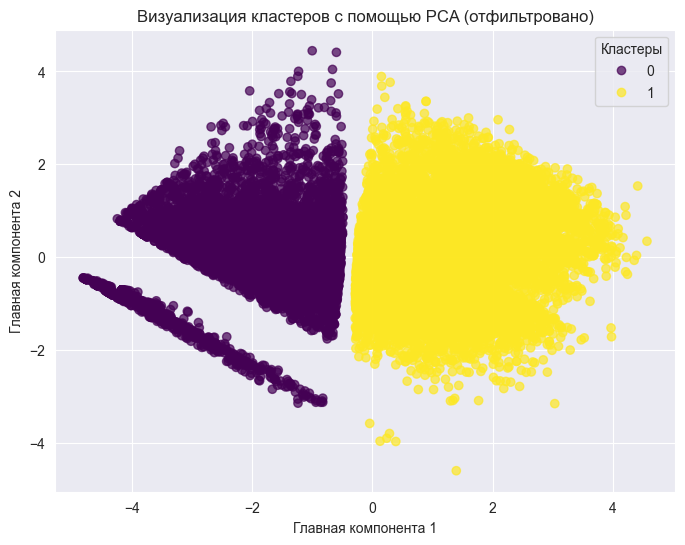

In [63]:
# Применение PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop("cluster", axis=1))
principal_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
principal_df["cluster"] = kmeans.labels_

# Получение центров кластеров
centers = kmeans.cluster_centers_
# Нормализация центров для PCA
centers_pca = pca.transform(centers)

# Вычисляем расстояния от точек до центров кластеров
distances_to_centers = np.array(
    [np.linalg.norm(principal_df[['PC1', 'PC2']].values - center, axis=1) for center in centers_pca])

# Находим разницу между расстояниями до обоих кластеров
distance_diff = np.abs(distances_to_centers[0] - distances_to_centers[1])

# Устанавливаем порог для определения "практически одинакового" расстояния
threshold = 0.25  # Порог, определяющий, насколько близки расстояния

# Фильтрация точек, находящихся практически одинаково от двух кластеров
filtered_df = principal_df[distance_diff > threshold]

# Визуализация отфильтрованных кластеров
plt.figure(figsize=(8, 6))
scatter = plt.scatter(filtered_df['PC1'], filtered_df['PC2'],
                      c=filtered_df['cluster'], cmap='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью PCA (отфильтровано)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend(*scatter.legend_elements(), title='Кластеры')
plt.grid(True)
plt.show()

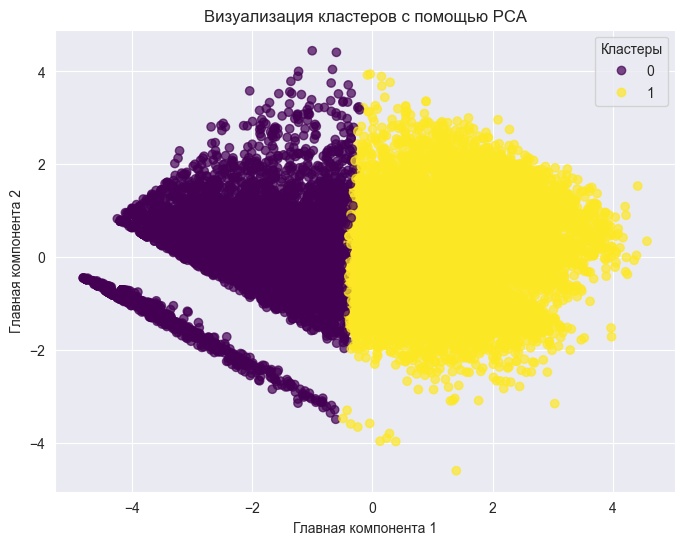

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop("cluster", axis=1))
principal_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
principal_df["cluster"] = kmeans.labels_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'],
                      c=principal_df['cluster'], cmap='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend(*scatter.legend_elements(), title='Кластеры')
plt.grid(True)
plt.show()

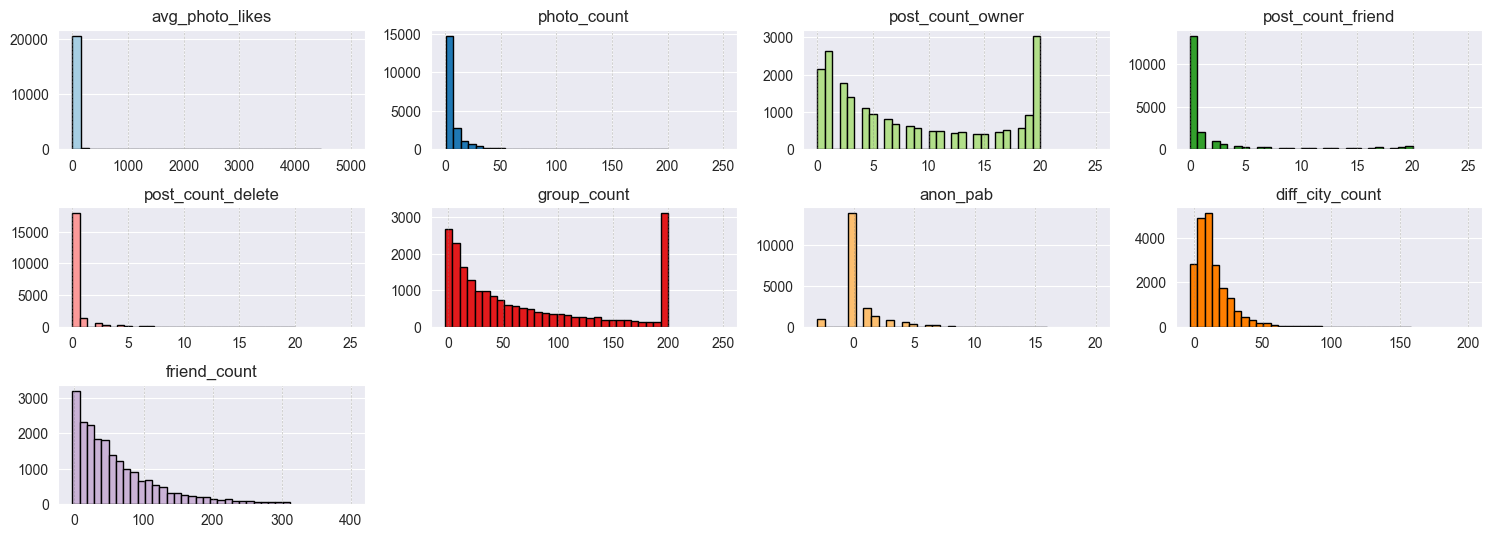

In [65]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(4, 4, figsize=(15, 7))
axes = axes.flatten()

colors = sns.color_palette("Paired", 11)

for i, col in enumerate(features_old.columns):
    ax = axes[i]
    ax.hist(features_old[col].dropna(), bins=30, color=colors[i % len(colors)], edgecolor='black')
    ax.set_title(col)

    # Disable scientific notation on y-axis.
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')

    for tick in ax.get_xticks():
        if tick < 0: continue
        ax.axvline(x=tick, color='grey', alpha=0.5, linestyle='--', linewidth=0.5)

for j in range(i + 1, len(axes)): axes[j].set_visible(False)

plt.tight_layout(pad=1.0)
plt.show()

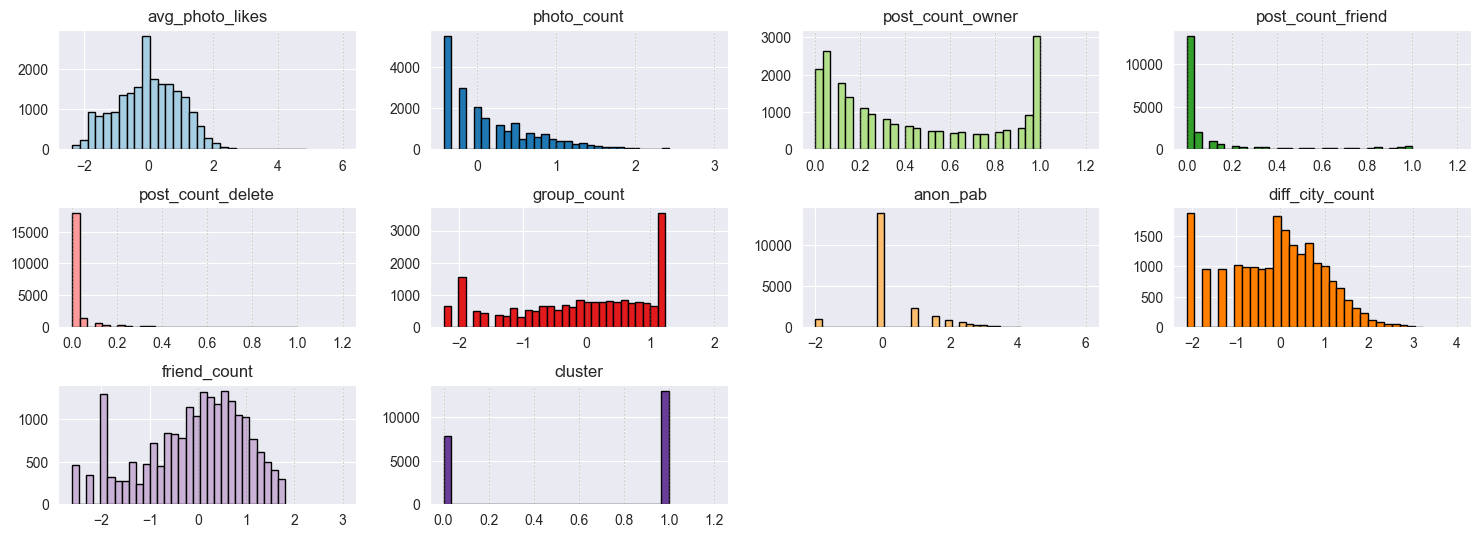

In [66]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(4, 4, figsize=(15, 7))
axes = axes.flatten()

colors = sns.color_palette("Paired", 11)

for i, col in enumerate(features.columns):
    ax = axes[i]
    ax.hist(features[col].dropna(), bins=30, color=colors[i % len(colors)], edgecolor='black')
    ax.set_title(col)

    # Disable scientific notation on y-axis.
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')

    for tick in ax.get_xticks():
        if tick < 0: continue
        ax.axvline(x=tick, color='grey', alpha=0.5, linestyle='--', linewidth=0.5)

for j in range(i + 1, len(axes)): axes[j].set_visible(False)

plt.tight_layout(pad=1.0)
plt.show()

<Axes: >

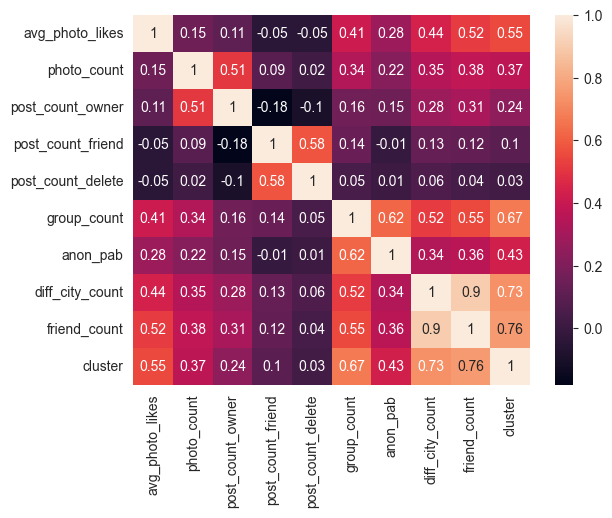

In [67]:
import seaborn as sns

sns.heatmap(round(features.corr(), 2), annot=True)

In [68]:
import numpy as np

# Поиск случайного пользователя из каждого кластера (ближайшего к центроиду)
centroids = kmeans.cluster_centers_
for cluster_idx in range(2):
    cluster_data = features[features['cluster'] == cluster_idx].drop(columns=['cluster'])
    centroid = centroids[cluster_idx]
    distances = np.linalg.norm(cluster_data.values - centroid, axis=1)
    closest_user_index = distances.argmin()
    closest_user = cluster_data.iloc[closest_user_index]
    print(f"Cluster {cluster_idx} - Closest User:\n{closest_user}\n")

Cluster 0 - Closest User:
avg_photo_likes     -0.491877
photo_count         -0.178747
post_count_owner     0.250000
post_count_friend    0.000000
post_count_delete    0.000000
group_count         -1.112347
anon_pab             0.000000
diff_city_count     -1.276473
friend_count        -1.205017
Name: 10317, dtype: float64

Cluster 1 - Closest User:
avg_photo_likes      0.346022
photo_count          0.251930
post_count_owner     0.300000
post_count_friend    0.000000
post_count_delete    0.000000
group_count          0.580301
anon_pab             1.000000
diff_city_count      0.341617
friend_count         0.470334
Name: 3598, dtype: float64

